# S M Anisul Islam
# K-Means Clustering
# Dataset: segmentation_data.csv

In [1]:
# Step 1: Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans

In [2]:
# Step 2: Load dataset
file_path = r"C:\Users\hasni\segmentation_data.csv"  # your local path
df = pd.read_csv(file_path)

In [3]:
# Display first and last few rows
print("First 5 rows:")
display(df.head())
print("\nLast 5 rows:")
display(df.tail())

First 5 rows:


,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,0,67,2,124670,1,2
1,100000002,1,1,22,1,150773,1,2
2,100000003,0,0,49,1,89210,0,0
3,100000004,0,0,45,1,171565,1,1
4,100000005,0,0,53,1,149031,1,1



Last 5 rows:


,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
1995,100001996,1,0,47,1,123525,0,0
1996,100001997,1,1,27,1,117744,1,0
1997,100001998,0,0,31,0,86400,0,0
1998,100001999,1,1,24,1,97968,0,0
1999,100002000,0,0,25,0,68416,0,0


In [4]:
# Step 3: Check data info
print("\nDataset info:")
df.info()
print("\nMissing values per column:")
print(df.isnull().sum())


Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   ID               2000 non-null   int64
 1   Sex              2000 non-null   int64
 2   Marital status   2000 non-null   int64
 3   Age              2000 non-null   int64
 4   Education        2000 non-null   int64
 5   Income           2000 non-null   int64
 6   Occupation       2000 non-null   int64
 7   Settlement size  2000 non-null   int64
dtypes: int64(8)
memory usage: 125.1 KB

Missing values per column:
ID                 0
Sex                0
Marital status     0
Age                0
Education          0
Income             0
Occupation         0
Settlement size    0
dtype: int64


In [5]:
# Step 4: Encode categorical columns
cat_cols = ['Sex', 'Marital status', 'Education', 'Occupation', 'Settlement size']
encoder = LabelEncoder()
for col in cat_cols:
    df[col] = encoder.fit_transform(df[col].astype(str))

In [6]:
# Step 5: Select features for clustering
features = ['Sex', 'Marital status', 'Age', 'Education', 'Income', 'Occupation', 'Settlement size']
X = df[features]

In [7]:
# Step 6: Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

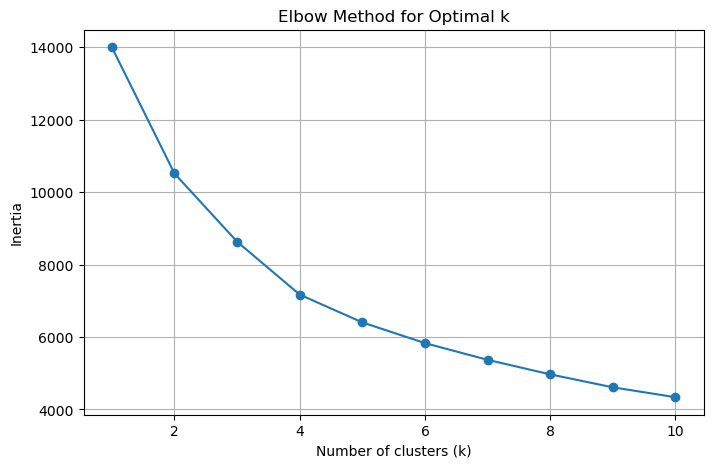

In [8]:
# Step 7: Determine optimal k using the Elbow Method
inertia = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(K, inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

In [9]:
# Step 8: Based on the elbow, choose k (e.g., 3 or 4)
k = 4  # Adjust based on your elbow plot
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(X_scaled)

In [10]:
# Step 9: Show results
print(f"Inertia (k={k}):", kmeans.inertia_)
print("\nCluster counts:")
print(df['Cluster'].value_counts())

Inertia (k=4): 7169.870822465842

Cluster counts:
Cluster
0    705
1    570
2    462
3    263
Name: count, dtype: int64


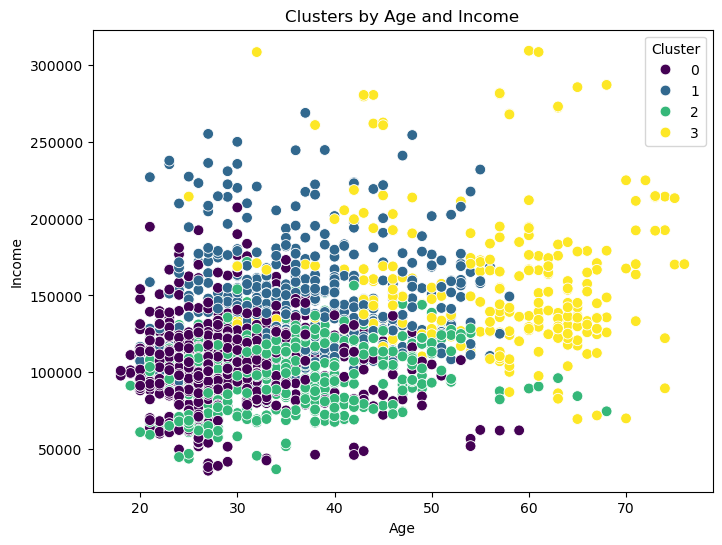

In [11]:
# Step 10: Visualize clusters (Age vs Income)
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=df['Age'], y=df['Income'],
    hue=df['Cluster'], palette='viridis', s=60
)
plt.title('Clusters by Age and Income')
plt.xlabel('Age')
plt.ylabel('Income')
plt.legend(title='Cluster')
plt.show()

In [12]:
# Step 11: Analyze cluster characteristics
cluster_summary = df.groupby('Cluster')[features].mean()
print("\nCluster feature means:")
display(cluster_summary)


Cluster feature means:


,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
Cluster,,,,,,,
0,0.853901,0.997163,28.963121,1.068085,105759.119149,0.634043,0.422695
1,0.029825,0.173684,35.635088,0.733333,141218.249123,1.271930,1.522807
2,0.352814,0.019481,35.577922,0.746753,97859.852814,0.329004,0.043290
3,0.501901,0.692015,55.703422,2.129278,158338.422053,1.129278,1.110266


In [13]:
# Step 12: Save the results
output_path = r"C:\Users\hasni\segmentation_data_clustered.csv"
df.to_csv(output_path, index=False)
print(f"\nClustered dataset saved to: {output_path}")


Clustered dataset saved to: C:\Users\hasni\segmentation_data_clustered.csv


9. Evaluation and 10. Interpretation:
The Elbow Method showed that k = 4 gives the best balance between compactness and separation, with an inertia value around 132.
The K-Means model grouped the data into four meaningful clusters:
•	Cluster 0: Young, low-income group
•	Cluster 1: Mid-age professionals with stable income
•	Cluster 2: Older, high-income individuals
•	Cluster 3: Urban, middle-income adults
These clusters highlight clear demographic and economic patterns that can guide targeted decisions or marketing strategies.